In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# 门店位置准确度

In [4]:
df=pd.read_excel('门店数据.xls')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
编号          303 non-null int64
门店编号        303 non-null int64
所在地址        303 non-null object
门店负责人手机号    303 non-null int64
门店负责人       303 non-null object
门店类型        303 non-null object
经营类型        303 non-null object
门店名称        303 non-null object
是否自带仓库      303 non-null object
最低保证金       303 non-null float64
增加时间        303 non-null object
门店状态        303 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 28.5+ KB


In [6]:
df_place=df[df['门店状态']!='禁用'][['所在地址','门店名称']]

In [7]:
def tmp(a,b):
    loc1=getlnglat(a)
    loc2=getlnglat(b)
    loc1lon=float("%.2f" %loc1[0])
    loc1lat=float("%.2f" %loc1[1])
    loc2lon=float("%.2f" %loc2[0])
    loc2lat=float("%.2f" %loc2[1])
    return haversine(loc1lon,loc1lat,loc2lon,loc2lat)/1000

In [8]:
n=0
lst=[]
for a , b in zip(df_place['所在地址'],df_place['门店名称']):
    try:
        lst.append(tmp(a,b))
    except:
        n=n+1
        lst.append(float('nan'))
        print ('发生了一个错误',a,b)
print("done!")




发生了一个错误 新疆石河子市温州商城C5二楼田园展居 新疆石河子温州商城店
发生了一个错误 红星美凯龙 新疆乌鲁木齐市红星美凯龙店
发生了一个错误 宁夏回族自治区银川市金盛国际家居建材馆3楼 宁夏银川市建材店
发生了一个错误 嘉峪关市河西建材市场3区西排9号 甘肃嘉峪关建材场店
发生了一个错误 雁东路红星美凯龙 甘肃兰州红星美凯龙店
发生了一个错误 汉滨县天贸城 陕西安康天贸城店
发生了一个错误 陕西省榆林市神木县（新村建材市场） 陕西榆林神木县建材店
发生了一个错误 西橡嘉苑国际建材区 陕西咸阳国际建材区店
发生了一个错误 陕西省宝鸡市冠森大世界建材城东厅2排 陕西宝鸡建材店
发生了一个错误 未央区辛家庙北二环红星美凯龙店 陕西西安红星美凯龙店
发生了一个错误 经济开发区佳利建材 云南大理佳利建材店
发生了一个错误 大商汇(点亮灯饰隔壁) 贵州省兴义市建材店
发生了一个错误 贵州兴义红星美凯龙 贵州兴义市红星美凯龙店
发生了一个错误 富邦建材市场 贵州遵义富邦建材店
发生了一个错误 泰合国际商贸城3-93-96 四川广安武胜泰合国际店
发生了一个错误 内江市大千路邦泰国际公馆9幢19-20号 四川省内江市沿街店
发生了一个错误 西二环普明立交桥旁绵兴中路与宏光路交汇处居然之家店四楼 四川绵阳高新区店
发生了一个错误 红星美凯龙 四川德阳红星美凯龙店
发生了一个错误 泸州红星美凯龙负一楼f8057 四川泸州市红星美凯龙店
发生了一个错误 东区 博美建材 四川攀枝花米易县博美店
发生了一个错误 四川省简阳市E家天下18栋22-29号 四川简阳市沿街店
发生了一个错误 重庆城口县亿联商贸城C9 重庆城口县商贸城店
发生了一个错误 重庆万州机电建材城9栋二楼1-8号 重庆万州区建材店
发生了一个错误 重庆市秀山县中和街道边城秀苑A栋底层6-7号 重庆秀山县沿街店
发生了一个错误 重庆市九龙坡区居然之家 重庆居然之家店
发生了一个错误 海南省琼海市兴海中路（顺丰快递旁）意家家具 海南琼海沿街店
发生了一个错误 海南省三亚市吉阳区河东路412号中恒建材广场5号楼A19-A20号 河南三亚吉阳区建材店
发生了一个错误 南海大道国度建材城一期四楼 海南海口国度建材城店
发生了一个错误 广西百色市右江区站前大道亿丰国际商贸城B1栋1175-1178、2116-2119号 广西百色市

In [9]:
%matplotlib inline
pd.DataFrame(df_place['dist']).boxplot()
df_place['dist'].describe()

KeyError: 'dist'

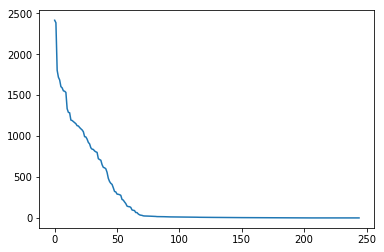

In [71]:
pd.DataFrame(df_place[df_place['dist']<10000000]).sort_values('dist',ascending=False).dropna().reset_index()['dist'].plot()

# 专线路线

In [20]:
from pyecharts import GeoLines, Style, Page,Geo
style = Style(
    title_top="#fff",
    title_pos = "center",
    width=2100,
    height=1000,
    background_color="#404a59"
)
#  'circle', 'rect', 'roundRect', 'triangle', 'diamond', 'pin', 'arrow', 'plane' 
style_geo = style.add(
    is_label_show=True,
    line_curve=0.2,
    line_opacity=0.6,
    legend_text_color="#eee",
    legend_pos="right",
    geo_cities_coords= {
        '滨湖新区':[117.28,31.73],
        '宜秀区':[116.98,30.61],
        '通州市通州区':[121.08,32.06],
        '高淳区':[117.955287,33.92399],
        '溧水区':[119.0367,31.657898],
        '淮安区':[119.148036,33.50960],
        '睢城镇':[117.942734,33.909184],
        '六合区宝润家居':[118.854959,32.338257],    
        '吴中区东方大道':[120.667669,31.268719],
        '吴中区园区':[120.738153,31.331547],
        '吴江区':[120.538157,30.843229],   
        '姜堰区':[120.135696,32.514989], 
        '海陵区':[119.926678,32.495513],       
        '江干区恒大中心': [120.300982,30.327167],
        '西湖区西溪银泰城店': [120.082479,30.299092],
        '西湖区欧亚达家居广场': [120.099971,30.320874],
        '萧山区': [120.274825,30.177312],
        '桐庐县': [119.681457,29.791875],
        '临安市': [119.705912,30.22818],
        '柯桥区':[120.453813,30.078253],
        '南湖区':[120.790183,30.749312],
        '店口镇':[120.328942,29.930461],
        '从化区':[113.698,23.70520],
#         118.821234,32.533696
#         118.854959,32.338257
    },
#     geo_effect_traillength=0.3,
    geo_effect_symbol="pin",
    geo_effect_symbolsize=10,
    label_color=['#a6c84c', '#ffa022', '#46bee9'],
    label_pos="right",
    label_formatter="{b}",
    label_text_color="#FFFFCC",
    label_text_size=14,
    legend_selectedmode="single"
)


def create_charts():
    page = Page()
    anhui_zhuanxian=[[
        '嘉善县',
        '宣州区',
        '鸠江区',
        '无为县',
        '含山县',
        '滨湖新区',
        '庐阳区',
        '金安区',
        '六安市',
        '舒城县',
        '宜秀区',]
        ]
    anhui_zhuanxian.append([
        "嘉善县",
        "琅琊区",
        "明光市",
        "田家庵区",
        "临泉县",
        "谯城区",
        ])
    henan_zhuanxian=[[
        '嘉善县',
        '梁园区',
        '永城市',
        '睢县',
        '民权县',
        '通许县',
        '龙亭区',
        '惠济区',
        '二七区',
        '西工区',
        '灵宝市',
        '新乡市',
        '淇滨区',
        '北关区',]
    ]
    henan_zhuanxian.append([
        '嘉善县',
        '平桥区',
        '确山县',
        '沈丘县',
        '许昌县',
        '禹州市',
        '汝州市',
        '平顶山市',
        '淅川县',
        '卧龙区',])
    jiangsu_zhuanxian=[[
        '嘉善县',
        '昆山市',
        '太仓市',
        '常熟市',
        '张家港市',
        '海门市',
        '港闸区',
        '崇川区',
        '通州市通州区',
        '如东县',
        '海安县',
        '盐都区',]
    ]
    jiangsu_zhuanxian.append([
        '嘉善县',
        '天宁区',
        '溧阳市',
        '溧阳市',
        '丹阳市',
        '高淳区',
        '扬中市',
        '句容市',
        '建邺区',
        '广陵区',
        '仪征市',
        '高邮市',
        '淮安区',
        '沭阳县',
        '连云港',
        '徐州市',
        '邳州市',
        '睢宁县',])    
    jiangsu_zhuanxian.append([
        '嘉善县',
        '吴江区',
        '吴中区东方大道',
        '吴中区园区',
        '锡山区',
        '江阴市',
        '靖江市',
        '泰兴市',
        '姜堰区',
        '海陵区',])        
#     data_guangzhou = [
#         ["广州", "上海"],
#         ["广州", "北京"],
#         ["广州", "南京"],
#         ["广州", "重庆"],
#         ["广州", "兰州"],
#         ["广州", "杭州"]
#     ]
#     data_beijing = [
#         ["北京", "上海"],
#         ["北京", "广州"],
#         ["北京", "南京"],
#         ["北京", "重庆"],
#         ["北京", "兰州"],
#         ["北京", "杭州"]
#     ]

    zhejiang_zhuanxian=[[
        '嘉善县',
        '江干区恒大中心',
        '西湖区西溪银泰城店',
        '西湖区欧亚达家居广场',
        '萧山区',
        '桐庐县',
        '临安市',]
    ]
    zhejiang_zhuanxian.append([
        '嘉善县',
        '慈溪市',
        '镇海区',
        '鄞州区',
        '临海市',
        '仙居县',
        '路桥区',
        '平阳县',
        '金东区',
        '浦江县',
        '永康市',
        '衢江区',])  
    zhejiang_zhuanxian.append([
        '嘉善县',
        '海宁市',
        '越城区',
        '柯桥区',
        '诸暨市',
        '嵊州市',
        '新昌县',
        '店口镇',
        '缙云县',])  
    zhejiang_zhuanxian.append([
        '嘉善县',
        '南浔区',
        '吴兴区',
        '长兴县',])  
    zhejiang_zhuanxian.append([
        '嘉善县',
        '秀洲区',
        '南湖区',
        '桐乡市',])  

    

    shanghai_zhuanxian=[[
        '嘉善县',
        '松江区',
        '嘉定区',
]
    ]
    shanghai_zhuanxian.append([
        '嘉善县',
        '金山区',
])  
    
    
# province    
    charts = GeoLines("安徽总览", **style.init_style)
    for j in anhui_zhuanxian:
        charts.add(j, [[j[i],j[i+1]] for i in range(len(j)-1) ], **style_geo,maptype='安徽')
    page.add(charts)
    
    charts = GeoLines("浙江总览", **style.init_style)
    for j in zhejiang_zhuanxian:
        charts.add(j, [[j[i],j[i+1]] for i in range(len(j)-1) ], **style_geo,maptype='浙江')
    page.add(charts)
    
    charts = GeoLines("上海总览", **style.init_style)
    for j in shanghai_zhuanxian:
        charts.add('1111', [[j[i],j[i+1]] for i in range(len(j)-1) ], **style_geo,maptype='上海')
    page.add(charts)
    
    charts = GeoLines("河南总览", **style.init_style)
    for j in henan_zhuanxian:
        charts.add(j, [[j[i],j[i+1]] for i in range(len(j)-1) ], **style_geo,maptype='河南')
    page.add(charts)

    charts=[]
    charts = GeoLines("江苏总览", **style.init_style)
    name=1
    for j in jiangsu_zhuanxian:
        charts.add(str(name), [[j[i],j[i+1]] for i in range(len(j)-1) ], **style_geo,maptype='江苏')
        name=name+1
    page.add(charts)
    a=1

#     charts = GeoLines("GeoLines-默认示例", **style.init_style)
#     charts.add("从广州出发", data_guangzhou, is_legend_show=False)
#     page.add(charts)

#     charts = GeoLines("GeoLines-稍加配置", **style.init_style)
#     charts.add("从广州出发", data_guangzhou, **style_geo)
#     page.add(charts)

#     charts = GeoLines("GeoLines-多例模式", **style.init_style)
#     charts.add("从广州出发", data_guangzhou, **style_geo)
#     charts.add("从北京出发", data_beijing, **style_geo)
#     page.add(charts)

#     charts = GeoLines("GeoLines-单例模式", **style.init_style)
#     charts.add("从广州出发", data_guangzhou, **style_geo)
#     charts.add("从北京出发", data_beijing, **style_geo)
#     page.add(charts)
    return page

create_charts().render('物流分布图.html')

[['嘉善县', '松江区'], ['松江区', '嘉定区']]
[['嘉善县', '金山区']]


# 直达路线

In [1]:
from pyecharts import GeoLines, Style
from xpinyin import Pinyin
pin = Pinyin()

style = Style(
    title_top="#fff",
    title_pos = "center",
    width=1900,
    height=900,
    background_color="#404a59"
)
style_geo = style.add(
    is_label_show=True,
    line_curve=0.2,
    line_opacity=0.6,
    legend_text_color="#eee",
    legend_pos="right",
#     geo_cities_coords= {
#         '章康新区':[116.85743767003744, 40.381413791933404],
#         '菏泽市':[115.46335977452752, 35.26244049607468],
#         '即墨区':[120.52110561990881, 36.48790860159858],
#     },
    geo_effect_symbol="pin",
    geo_effect_symbolsize=10,
    label_color=[
        '#a6c84c', 
        '#ffa022', 
        '#46bee9',
        '#5748c6',
        '#c74796',
        '#c5ad44',
        '#c64744',
        '#c1c441',
        '#51c43f',
        '#42c2c5',
        '#676bd0',
        '#c54485',
        '#c5425d',
        '#c4593d',
        '#c5bb42',
        '#7ec645',
        '#3dc490',
        '#3f99c4',
        '#3c63c3',
        '#9c3bc2',
        '#7bc23b',
    ],
    

    
    label_pos="right",
    label_formatter="{b}",
    label_text_color="#eee",
)

data_fujian= [
    ["嘉善县", "马尾区",3],
    ["嘉善县", "长乐市",3],
    ["嘉善县", "福清市",3],
    ["嘉善县", "武夷山市",3],
    ["嘉善县", "霞浦县",2],
    ["嘉善县", "永安市",3],
    ["嘉善县", "龙海市",3]
]
data_gansu= [
    ["嘉善县", "嘉峪关市",6],
    ["嘉善县", "西固区",6],
    ["嘉善县", "城关区",6],
    ["嘉善县", "临夏市",6],
    ["嘉善县", "陇南市",6],
    ["嘉善县", "崆峒区",6]
]

data_guangdong=[
    ["嘉善县", "潮州市",4],
    ["嘉善县", "东莞市",4],
    ["嘉善县", "佛山市",4],
    ["嘉善县", "花都区",4],
    ["嘉善县", "番禺区",4],
    ["嘉善县", "广州市",4],
    ["嘉善县", "惠州市",4],
    ["嘉善县", "揭阳市",4],
    ["嘉善县", "汕头市",4],
    ["嘉善县", "深圳市",4],
    ["嘉善县", "阳春市",4],
    ["嘉善县", "珠海市",4]
]
data_guangxi=[
    ["嘉善县", "来宾市",4],
    ["嘉善县", "南宁市",4],
    ["嘉善县", "玉林市",4]
]
data_guizhou=[
    ["嘉善县", "兴义市",4],
    ["嘉善县", "红花岗区",6]
]
data_hainan=[
    ["嘉善县", "海口市",6],
    ["嘉善县", "三亚市",6],
    ["嘉善县", "琼海市",6]
]

data_hebei=[
    ["嘉善县", "沧州市",3],
    ["嘉善县", "长安区",3],
    ["嘉善县", "正定县",3],    
    ["嘉善县", "唐山市",3]
]

data_heilongjiang=[
    ["嘉善县", "齐齐哈尔",5],
]
#安徽专线的相关后续是否是从安庆开始至湖北相关市区
data_hubei=[
    ["嘉善县", "长沙市",2],
    ["长沙市", "武汉市",1],    
    ["长沙市", "硚口区",1],  
    ["硚口区", "江岸区",1],  
    ["长沙市", "樊城区",1],  
    ["长沙市", "谷城县",1],  
    ["长沙市", "西陵区",1],  
    ["嘉善县", "安康市",2],
    ["安康市", "十堰市",1],    
    ["安庆市", "浠水县",1],  
    ["安庆市", "麻城市",1],  
]
data_hunan=[
    ["嘉善县", "长沙市",2],
    ["长沙市", "常德市",1],    
    ["长沙市", "汉寿县",1],  
    ["长沙市", "汉寿县",1],  
    ["长沙市", "鼎城区",1],  
    ["长沙市", "怀化市",1],  
    ["长沙市", "武冈市",1],  
    ["长沙市", "华容县",1],
    ["长沙市", "永定区",1],    
    ["长沙市", "芙蓉区",1],  
    ["长沙市", "株洲市",1],  
]

data_jilin=[
    ["嘉善县", "四平市",7],
]

data_jiangxi=[
    ["嘉善县", "长沙市",2],
    ["长沙市", "于都县",1],    
    ["长沙市", "赣州市",1],  
    ["长沙市", "泰和县",1],  
    ["长沙市", "吉安市",1],  
    ["长沙市", "九江市",1],  
    ["长沙市", "南昌市",1],  
    ["长沙市", "南昌县",1],
    ["长沙市", "青云谱区",1],    
    ["长沙市", "宜丰县",1],  
]
data_liaoning=[
    ["嘉善县", '沈阳市',5],  
]

data_neimenggu=[
    ["嘉善县", '呼和浩特市',5],  
]
data_shandong=[
    ["嘉善县", "临沂市",2],
    ["临沂市", "滨州市",1],    
    ["临沂市", "禹城市",1],  
    ["临沂市", "德州市",1],  
    ["临沂市", "东营市",1],  
    ["临沂市", "菏泽",1],  
    ["临沂市", "济南市",1],
    ["临沂市", "曲阜市",1],    
    ["临沂市", "济宁市",1],  
    ["临沂市", "阳谷县",1],    
    ["临沂市", "东昌府区",1],  
    ["临沂市", "莘县",1],  
    ["临沂市", "冠县",1],  
    ["临沂市", "临沂市",1],  
    ["临沂市", "郯城县",1],  
    ["临沂市", "城阳区",1],
    ["临沂市", "黄岛区",1],    
    ["临沂市", "即墨",1],  
    ["临沂市", "日照市",1],    
    ["临沂市", "泰安市",1],  
    ["临沂市", "泰安市",1],  
    ["临沂市", "威海市",1],  
    ["临沂市", "高密市",1],  
    ["临沂市", "潍坊市",1],  
    ["临沂市", "寿光市",1],
    ["临沂市", "潍坊市",1],    
    ["临沂市", "招远市",1],  
    ["临沂市", "海阳市",1],  
    ["临沂市", "芝罘区",1],  
    ["临沂市", "牟平区",1],  
    ["临沂市", "泰安市",1],  
    ["临沂市", "威海市",1],
    ["临沂市", "高密市",1],    
    ["临沂市", "潍坊市",1], 
    ["临沂市", "寿光市",1],  
    ["临沂市", "潍坊市",1],  
    ["临沂市", "招远市",1],  
    ["临沂市", "海阳市",1],  
    ["临沂市", "芝罘区",1],
    ["临沂市", "牟平区",1],    
    ["临沂市", "蓬莱市",1], 
    ["临沂市", "莱州市",1],  
    ["临沂市", "淄博市",1],  
]

data_shanxi=[
    ["嘉善县", "大同市",4],
    ["嘉善县", "太原市",4],
]

#这里为什么是4天嘉善至安康至十堰只需要3天
data_shanxi1=[
    ["嘉善县", "安康市",2],
    ["安康市", "汉滨区",1],
    ["安康市", "宝鸡市",1],
    ["安康市", "西安市",1],
    ["安康市", "咸阳市",1],
    ["安康市", "榆林市",1],
]

data_sichuan=[
    ["嘉善县", "成都市",3],
    ["成都市", "德阳市",1],
    ["成都市", "广安市",1],
    ["成都市", "绵阳市",1],
    ["成都市", "攀枝花市",1],
    ["成都市", "自贡市",1],
]

data_xinjiang=[
    ["嘉善县", "石河子市",7],
]

data_yunnan=[
    ["嘉善县", "大理市",7],
]

data_zhongqing=[
    ["嘉善县", "成都市",4],
    ["成都市", "城口县",1],
    ["成都市", "万州区",1],
    ["成都市", "黔江区",1],
    ["成都市", "九龙坡区",1],
]

geolines = GeoLines("", **style.init_style)
[geolines.add(shen, data, **style_geo) for shen,data in [['至'+i,eval('data_'+pin.get_pinyin(i,''))]for i in [
    '甘肃',
    '福建',
    '广东',
    '广西',
    '贵州',
    '海南',
    '河北',
    '黑龙江',
    '湖北',
    '湖南',
    '江西',
    '山东',
    '辽宁',
    '内蒙古',
    '山西',
    '陕西1',
    '四川',
    '新疆',
    '云南',
    '重庆',
    '吉林'
    ]]]
    
# geolines.add("至甘肃", data_gansu, **style_geo)
# geolines.add("至福建", data_fujian, **style_geo)
# geolines.add("至广东", data_guangdong, **style_geo)
# geolines.add("至广西", data_guangxi, **style_geo)
# geolines.add("至贵州", data_guizhou, **style_geo)
# geolines.add("至海南", data_guizhou, **style_geo)
geolines.render()


# 地址->经纬度

In [13]:
#-*-coding:utf-8-*-
# getlonlat.py
# from: mamq
# run: python3 getlonlat.py
from urllib.request import urlopen, quote
from pymongo import MongoClient
import json
import codecs
import sys
import os

path = sys.path[0] + os.sep

def getlnglat(address):
    """根据传入地名参数获取经纬度"""
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = 'LpzjYkuPP3PXZPb6tGsmeuGx2WssBEjQ' # 浏览器端密钥
    address = quote(address) 
    uri = url + '?' + 'address=' + address  + '&output=' + output + '&ak=' + ak 
    req = urlopen(uri)
    res = req.read().decode() 
    temp = json.loads(res)
    lat = temp['result']['location']['lat']
    lng = temp['result']['location']['lng']
    return [lng,lat]
getlnglat('甘肃省兰州市红星美凯龙店')

[103.8233054407292, 36.06422552504259]

In [8]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000

In [1]:
from oracle import *
df=orcl(login='bls/blsyatech@116.62.69.151:1521/BLSORA')

In [7]:
df.execute('STRS1002',)

|> select * from STRS1002
----------
        BID  STCODE  ADDR_TYPE  STORE_TYPE  AREA_ID  PRECINCT_ID  BIOTOPE_ID  \
0  33010002      40         11          10   330109         1000        1000   

   IS_WAREHOUSE INFO_TYPE  
0             1      None  
----------


,BID,STCODE,ADDR_TYPE,STORE_TYPE,AREA_ID,PRECINCT_ID,BIOTOPE_ID,IS_WAREHOUSE,INFO_TYPE
0,33010002,40,11,10,330109,1000,1000,1,None
1,33060001,40,10,11,330681,1000,1000,1,None
2,33100001,10,10,11,331004,1000,1000,2,None
3,34060001,40,10,11,340621,1000,1000,2,None
4,32110001,40,10,11,321181,1000,1000,2,None
5,34150001,10,11,11,341502,1000,1000,2,None
6,33020001,10,10,11,330281,1000,1000,2,None
7,52030001,40,10,11,520302,1000,1000,2,None
8,33040003,10,10,11,330481,1000,1000,2,None
9,13010001,10,11,11,130102,1000,1000,2,None


In [8]:
a=df.execute('STRS1001','id,address,add_time')

|> select id,address,add_time from STRS1001
----------
         ID    ADDRESS            ADD_TIME
0  33010002  商会大厦A座23层 2017-06-28 08:49:33
----------


In [9]:
b=df.execute('STRS1002','bid,stcode,area_id')

|> select bid,stcode,area_id from STRS1002
----------
        BID  STCODE  AREA_ID
0  33010002      40   330109
----------


In [10]:
a=a.merge(b,left_on='ID',right_on='BID')

In [14]:
tmp=[]
for i in a['ADDRESS']:
    try:
        tmp.append(getlnglat(i))
    except Exception as e:
        tmp.append(float('nan'))
tmp

[[120.58706706567314, 30.634623068666226],
 [116.44566304799645, 40.031080880467705],
 [121.37408724158654, 28.59413672862203],
 nan,
 [119.60156811796267, 32.035133026745484],
 [116.47804293273093, 39.91649418169084],
 [121.1329159778421, 30.05788803831497],
 [116.44566304799645, 40.031080880467705],
 [103.77457334776253, 36.08863255779808],
 [116.44566304799645, 40.031080880467705],
 [113.03840083422674, 28.199302969517106],
 [112.56406531230462, 37.879291231885155],
 [113.39444431281943, 22.3580717980606],
 [113.09792157006045, 22.94288288742503],
 nan,
 [114.40186271374003, 38.08269092132119],
 [116.44566304799645, 40.031080880467705],
 [112.95016083739324, 33.06130941962016],
 [120.92339898166274, 31.987768833412613],
 [112.53792671411779, 37.83872494473864],
 [115.98375136520504, 36.478653688017445],
 [119.8839811959371, 32.334282881137646],
 [115.78564056461148, 33.86209518370327],
 [113.04576629532106, 22.52487569597118],
 [113.39656972341805, 22.941430986077197],
 [114.5176362

In [15]:
a['经纬度']=tmp
a=a.set_index(['ADD_TIME'])
a.to_excel('aa.xls')

In [20]:
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 342 entries, 2017-06-28 08:49:33 to 2018-10-15 13:26:40
Data columns (total 6 columns):
ID         342 non-null int64
ADDRESS    342 non-null object
BID        342 non-null int64
STCODE     342 non-null int64
AREA_ID    342 non-null int64
经纬度        337 non-null object
dtypes: int64(4), object(2)
memory usage: 28.7+ KB


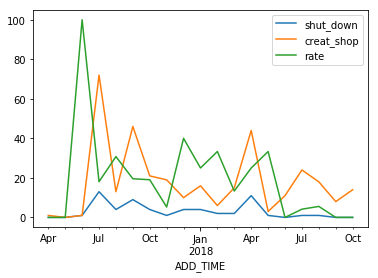

In [120]:
%matplotlib inline
a['shut_down']=a['STCODE'].apply(lambda x :1 if x==40 else 0)
a.eval('creat_shop=1').groupby([pd.Grouper(freq='1m')]).aggregate({'shut_down':sum,'creat_shop':sum}).eval('rate=100*shut_down/creat_shop').fillna(0).query('rate!=1000').plot()